In [224]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [225]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('cops.cleaned.translated.csv')

In [85]:
df.head()

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,Meeting,Location,Female,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,COP 1,Berlin,0.0,0,0,0,1,0.0,339.0,ALB
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,COP 1,Berlin,0.0,0,0,0,1,0.0,339.0,ALB
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,COP 1,Berlin,0.0,0,0,0,1,0.0,615.0,DZA
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,COP 1,Berlin,0.0,0,0,0,1,0.0,615.0,DZA
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,COP 1,Berlin,0.0,0,0,0,1,0.0,615.0,DZA


In [86]:
df.to_csv('test.csv', index=False)

In [87]:
df.shape

(367741, 20)

In [88]:
df['Job_Title'].value_counts().shape

(76184,)

In [89]:
df['Year'].value_counts().reset_index().sort_values(by='Year')

,Year,count
27,1995,2026
28,1996,1633
20,1997,5390
24,1998,4024
25,1999,3545
19,2000,6027
18,2001,6866
26,2002,2932
23,2003,4644
21,2004,5360


In [90]:
pd.options.display.max_rows = 500

In [91]:
df['Delegation'].value_counts().head(100)

Delegation
Brazil                                                  7971
United Arab Emirates                                    6418
China                                                   4323
Japan                                                   4248
Indonesia                                               4015
France                                                  3961
Canada                                                  3942
Morocco                                                 3885
Azerbaijan                                              3781
United States of America                                3698
Turkey                                                  3576
Republic of Korea                                       3201
Germany                                                 3066
Nigeria                                                 2900
United Kingdom of Great Britain and Northern Ireland    2682
Russian Federation                                      2663
International

In [92]:
df.groupby('Year')['Female'].value_counts()

Year  Female
1995  0.0        1544
      1.0         433
1996  0.0        1271
      1.0         337
1997  0.0        4367
      1.0        1018
1998  0.0        3022
      1.0        1001
1999  0.0        2643
      1.0         901
2000  0.0        4342
      1.0        1677
2001  0.0        5114
      1.0        1734
2002  0.0        2233
      1.0         663
2003  0.0        3320
      1.0        1314
2004  0.0        3750
      1.0        1602
2005  0.0        5937
      1.0        2703
2006  0.0        3650
      1.0        1616
2007  0.0        6224
      1.0        2789
2008  0.0        5315
      1.0        2984
2009  0.0       15487
      1.0        8550
2010  0.0        6713
      1.0        3848
2011  0.0        7134
      1.0        4086
2012  0.0        5457
      1.0        2843
2013  0.0        4703
      1.0        3007
2014  0.0        5057
      1.0        3354
2015  0.0       13176
      1.0        7091
2016  0.0        9962
      1.0        5360
2017  0.0        72

In [93]:
pivot_table = pd.pivot_table(df, 
                            columns='Delegation',
                             values=['Person_Name'], 
                             index='Year',  # Rows
                             aggfunc={'size'})  # Aggregation


In [94]:
pivot_table

Person_Name                          \
                         size                           
Delegation 2050 Climate Group 2° Investing Initiative   
Year                                                    
1995                      NaN                     NaN   
1996                      NaN                     NaN   
1997                      NaN                     NaN   
1998                      NaN                     NaN   
1999                      NaN                     NaN   
2000                      NaN                     NaN   
2001                      NaN                     NaN   
2002                      NaN                     NaN   
2003                      NaN                     NaN   
2004                      NaN                     NaN   
2005                      NaN                     NaN   
2006                      NaN                     NaN   
2007                      NaN                     NaN   
2008                      NaN                     NaN   
2009                      NaN                     NaN   
2010                      NaN                     NaN   
2011                      NaN                     NaN   
2012                      NaN                     NaN   
2013                      NaN                     NaN   
2014                      NaN                     NaN   
2015                      NaN                     3.0   
2016                      NaN                     3.0   
2017                      NaN                     NaN   
2018                      NaN                     3.0   
2019                      NaN                     2.0   
2021                     16.0                     2.0   
2022                      NaN                     2.0   
2023                      NaN                     3.0   
2024                      4.0                     NaN   

                                                               \
                                                                
Delegation 350 The Climate Movement In Denmark 350.Org 50by40   
Year                                                            
1995                                       NaN     NaN    NaN   
1996                                       NaN     NaN    NaN   
1997                                       NaN     NaN    NaN   
1998                                       NaN     NaN    NaN   
1999                                       NaN     NaN    NaN   
2000                                       NaN     NaN    NaN   
2001                                       NaN     NaN    NaN   
2002                                       NaN     NaN    NaN   
2003                                       NaN     NaN    NaN   
2004                                       NaN     NaN    NaN   
2005                                       NaN     NaN    NaN   
2006                                       NaN     NaN    NaN   
2007                                       NaN     NaN    NaN   
2008                                       NaN     NaN    NaN   
2009                                       NaN     NaN    NaN   
2010                                       NaN     NaN    NaN   
2011                                       NaN     NaN    NaN   
2012                                       NaN     NaN    NaN   
2013                                       NaN     NaN    NaN   
2014                                       NaN     NaN    NaN   
2015                                       NaN     NaN    NaN   
2016                                       NaN     NaN    NaN   
2017                                       NaN     NaN    NaN   
2018                                       NaN     NaN    NaN   
2019                                       NaN     NaN    NaN   
2021                                       8.0    19.0    NaN   
2022                                       1.0    57.0    4.0   
2023                                       1.0    30.0    NaN   
2024                                       NaN    14.0  

In [107]:
df_na_countries = pd.read_csv('processed_chunk.csv')
df_na_countries.head()

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,Party,IO,Delegation_COW,Delegation_ISO,Job Title,Count,Category,Confidence Score,English short name,Country
0,Parties,European Community,Ms,Ritt Bierregaard,Member of the Commission,NaN,Environment and Nuclear Safety European Community,0,0,1995,...,1,0.0,NaN,NaN,Member of the Commission,4.0,Membership & Representative Roles,0.199392,NaN,Unable to determine
1,Parties,European Community,Mr,Marius Enthoven,DG XI (Director General),NaN,Environment Nuclear Safety and Civil Protectio...,0,0,1995,...,1,0.0,NaN,NaN,DG XI (Director General),1.0,Leadership & Executive Roles,0.249760,NaN,Netherlands
2,Parties,European Community,Ms,Christine Dalby,NaN,Cabinet Bjerregaard,European Community,0,0,1995,...,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark
3,Parties,European Community,Mr,Jorgen Henningsen,Director,Directorate D; European Commission,European Community,0,0,1995,...,1,0.0,NaN,NaN,Director,14128.0,Managerial Roles,0.197212,NaN,Denmark
4,Parties,European Community,Mr,Michel Ayral,Ditector for Energy Policy,DGXVIL (Energy),European Community,0,0,1995,...,1,0.0,NaN,NaN,Ditector for Energy Policy,1.0,Expert & Specialist Roles,0.286978,NaN,France


In [96]:
df_na_countries.dtypes

Group_Type             object
Delegation             object
Honorific              object
Person_Name            object
Job_Title              object
Division               object
Affiliation            object
Virtual                 int64
Overflow                int64
Year                    int64
Meeting                object
Location               object
Female                float64
IGO                     int64
NGO                     int64
Observer                int64
Party                   int64
IO                    float64
Delegation_COW        float64
Delegation_ISO        float64
Job Title              object
Count                 float64
Category               object
Confidence Score      float64
English short name    float64
Country                object
dtype: object

In [97]:
iso = pd.read_csv('ISO_codes.csv')

In [98]:
iso.head()

,English short name,French short name,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,Afghanistan (l'),AF,AFG,4
1,Albania,Albanie (l'),AL,ALB,8
2,Algeria,Algérie (l'),DZ,DZA,12
3,American Samoa,Samoa américaines (les),AS,ASM,16
4,Andorra,Andorre (l'),AD,AND,20


In [99]:
iso = iso.drop(columns=['French short name', 'Alpha-2 code', 'Numeric'])

In [100]:
iso['Delegation_ISO'] = iso['Alpha-3 code']

In [101]:
iso = iso.drop(columns=['Alpha-3 code'])

In [102]:
df_iso = pd.merge(df, iso, on='Delegation_ISO', how='left')
df_iso

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,Location,Female,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,English short name
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,...,Berlin,0.0,0,0,0,1,0.0,339.0,ALB,Albania
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,...,Berlin,0.0,0,0,0,1,0.0,339.0,ALB,Albania
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,...,Berlin,0.0,0,0,0,1,0.0,615.0,DZA,Algeria
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,...,Berlin,0.0,0,0,0,1,0.0,615.0,DZA,Algeria
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,...,Berlin,0.0,0,0,0,1,0.0,615.0,DZA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367736,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Lingyi Yang,PhD Student,College of Forestry,Beijing Forestry University,1,0,2024,...,Baku,1.0,0,1,0,0,0.0,NaN,NaN,NaN
367737,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Ziwen Zhang,Project Manager,Youth Sustainability Project,Green Pine Care Foundation,1,0,2024,...,Baku,1.0,0,1,0,0,0.0,NaN,NaN,NaN
367738,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Siyu Liu,Co-Chair,General,Human and Nature Youth Club,1,0,2024,...,Baku,1.0,0,1,0,0,0.0,NaN,NaN,NaN
367739,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Caitlin Anne Murphy,Staff,Sustainability Hub,The University of British Columbia,1,0,2024,...,Baku,1.0,0,1,0,0,0.0,NaN,NaN,NaN


In [108]:
df_na_countries = df_na_countries.drop(columns=['Group_Type', 'Delegation', 'Honorific', 'Job_Title', 'Division', 'Virtual', 'Overflow', 'Meeting', 'Location', 'Female', 'IGO', 'NGO', 'Observer', 'Party', 'IO', 'Delegation_COW', 'Delegation_ISO', 'Job Title', 'Count', 'Category', 'Confidence Score', 'English short name'])

In [109]:
df_na_countries.dtypes

Person_Name    object
Affiliation    object
Year            int64
Country        object
dtype: object

In [111]:
df_countries = pd.merge(df_iso, df_na_countries, on=['Person_Name', 'Affiliation', 'Year'], how='left')

In [105]:
df_countries

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation_x,Virtual,Overflow,Year_x,...,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,English short name,Affiliation_y,Year_y,Country
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,...,0,0,1,0.0,339.0,ALB,Albania,NaN,NaN,NaN
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,...,0,0,1,0.0,339.0,ALB,Albania,NaN,NaN,NaN
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,NaN,NaN
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,NaN,NaN
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705123,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Ziwen Zhang,Project Manager,Youth Sustainability Project,Green Pine Care Foundation,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,Green Pine Care Foundation,2024.0,China
705124,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Siyu Liu,Co-Chair,General,Human and Nature Youth Club,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,Human and Nature Youth Club,2024.0,China
705125,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Caitlin Anne Murphy,Staff,Sustainability Hub,The University of British Columbia,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,The University of British Columbia,2024.0,Canada
705126,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Mr,Chen Wang,Events Director,The Climate Society,The Climate Society,1,0,2024,...,1,0,0,NaN,NaN,NaN,NaN,NaN,2009.0,China


In [113]:
df_countries = df_countries.drop_duplicates()

In [114]:
df_countries.shape

(367792, 22)

In [115]:
df_countries['Country_combined'] = df_countries['English short name'].fillna('') + ' ' + df_countries['Country'].fillna('')

In [124]:
df_countries['Country_combined'] = df_countries['Country_combined'].str.strip()

In [223]:
#df_countries['Country_combined'].value_counts()

In [126]:
import pandas as pd

country_mapping = {
    # United States
    'United States of America (the)': 'United States',
    'USA': 'United States',
    'US': 'United States',
    'United States of America': 'United States',
    
    # United Kingdom
    'United Kingdom of Great Britain and Northern Ireland (the)': 'United Kingdom',
    'UK': 'United Kingdom',
    'Great Britain': 'United Kingdom',
    'Britain': 'United Kingdom',
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'Wales': 'United Kingdom',
    
    # Russia
    'Russian Federation (the)': 'Russia',
    
    # South Korea
    'Korea (the Republic of)': 'South Korea',
    'South Korea': 'South Korea',
    
    # North Korea
    'Korea (the Democratic People\'s Republic of)': 'North Korea',
    
    # Iran
    'Iran (Islamic Republic of)': 'Iran',
    
    # Turkey
    'Türkiye': 'Turkey',
    
    # Vietnam
    'Viet Nam': 'Vietnam',
    
    # Ivory Coast
    'Côte d\'Ivoire': 'Ivory Coast',
    'Côte D\'ivoire': 'Ivory Coast',
    'Cote d\'Ivoire': 'Ivory Coast',

    # DR Congo
    'Congo (the Democratic Republic of the)': 'Democratic Republic of the Congo',
    'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
    'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
    'DR Congo': 'Democratic Republic of the Congo',

    # Republic of the Congo
    'Congo (the)': 'Republic of the Congo',
    'Congo, Republic of the': 'Republic of the Congo',
    
    # UAE
    'United Arab Emirates (the)': 'United Arab Emirates',
    'UAE': 'United Arab Emirates',
    
    # Tanzania
    'Tanzania, the United Republic of': 'Tanzania',
    
    # Sudan
    'Sudan (the)': 'Sudan',
    
    # Niger
    'Niger (the)': 'Niger',
    
    # Philippines
    'Philippines (the)': 'Philippines',
    
    # Netherlands
    'Netherlands (Kingdom of the)': 'Netherlands',
    
    # Gambia
    'Gambia (the)': 'Gambia',
    'The Gambia': 'Gambia',
    
    # Micronesia
    'Micronesia (Federated States of)': 'Micronesia',
    
    # Syria
    'Syrian Arab Republic (the)': 'Syria',
    
    # Czechia
    'Czech Republic': 'Czechia',
    
    # Moldova
    'Moldova (the Republic of)': 'Moldova',
    
    # Venezuela
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    
    # Bolivia
    'Bolivia (Plurinational State of)': 'Bolivia',
    
    # Brunei
    'Brunei Darussalam': 'Brunei',
    
    # Palestine
    'Palestine, State of': 'Palestine',
    
    # Macau & Hong Kong
    'Macao': 'Macau',
    
    # Swaziland (now Eswatini)
    'Swaziland': 'Eswatini',
    
    # Cape Verde
    'Cape Verde': 'Cabo Verde',
    
    # Sao Tome and Principe
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    
    # Saint Vincent and the Grenadines
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',

    # Bahamas
    'Bahamas (the)': 'Bahamas',

    # Holy See (Vatican)
    'Holy See (the)': 'Vatican City',
    
    # Miscellaneous
    'Brazil Brazil': 'Brazil',
    'Bangladesh Bangladesh': 'Bangladesh',
    'China China': 'China',
    'France France': 'France',
    'Argentina Argentina': 'Argentina',
    'Australia Australia': 'Australia',
    'Chile Chile': 'Chile',
    'India India': 'India',
    'Indonesia Indonesia': 'Indonesia',
    'Malaysia Malaysia': 'Malaysia',
    'Nepal Nepal': 'Nepal',
    'Nigeria Unable to determine': 'Nigeria',
    'Papua New Guinea Argentina': 'Papua New Guinea',
    'United Arab Emirates (the) United Arab Emirates': 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland (the) United Kingdom': 'United Kingdom',
    'United Kingdom of Great Britain and Northern Ireland (the) Unable to determine': 'United Kingdom',
    'United States of America (the) United States': 'United States',
    'United States of America 38': 'United States',
    'Gambia (the) Unable to determine': 'Gambia',
    'Congo (the Democratic Republic of the) Canada': 'Democratic Republic of the Congo',
    'Congo (the Democratic Republic of the) United States': 'Democratic Republic of the Congo',
    'Dominican Republic (the)': 'Dominican Republic',
    'Marshall Islands (the)': 'Marshall Islands',
    'Cayman Islands 16': 'Cayman Islands',
    'British Virgin Islands 6': 'British Virgin Islands',
    'Central African Republic (the)': 'Central African Republic',
}

df_countries['Country_combined'] = df_countries['Country_combined'].replace(country_mapping)

df_countries

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,English short name,Country,Country_combined
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,...,0,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,...,0,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369155,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Lingyi Yang,PhD Student,College of Forestry,Beijing Forestry University,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369156,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Ziwen Zhang,Project Manager,Youth Sustainability Project,Green Pine Care Foundation,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369157,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Siyu Liu,Co-Chair,General,Human and Nature Youth Club,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369158,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Caitlin Anne Murphy,Staff,Sustainability Hub,The University of British Columbia,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,Canada,Canada


In [222]:
#df_countries['Country_combined'].value_counts()

In [131]:
import pandas as pd

country_mapping.update({
    # Brazil
    'Brazil Unable to determine': 'Brazil',
    'Brazil Mexico': 'Brazil',

    # Côte d'Ivoire
    "Côte D'Ivoire": 'Ivory Coast',

    # Turkey
    'Türkiye Turkey': 'Turkey',

    # Western Sahara (territory, not a country)
    'Western Sahara': 'Western Sahara',

    # Small territories and islands
    'Anguilla': 'Anguilla',
    'Northern Mariana Islands': 'Northern Mariana Islands',
    'Guam': 'Guam',
    'Falkland Islands': 'Falkland Islands',
    'Curaçao': 'Curaçao',
    'Cook Islands (the) Unable to determine': 'Cook Islands',
    'Marshall Islands (the) United Kingdom': 'Marshall Islands',
    'Federated States of Micronesia': 'Micronesia',
    
    # Lebanon
    'Liban': 'Lebanon',

    # Gambia
    'The Green Climate Fund is an international organization. Ibrahim Pam is the Executive Director of the Green Climate Fund.\n\nBased on searching for Ibrahim Pam, he is from The Gambia.': 'Gambia',

    # India (Mizoram is a state in India)
    'Mizoram': 'India',

    # United Kingdom
    'David Hopkins suggests United Kingdom.': 'United Kingdom',

    # Hawaii & Alaska (Part of the USA)
    'Hawaii': 'United States',
    'Alaska': 'United States',

    # Libya
    'Libya Unable to determine': 'Libya',

    # Malta
    'Malta Malta': 'Malta',

    # Fiji
    'Fiji Fiji': 'Fiji',

    # Ecuador
    'Erika Carrillo Becerra suggests a Spanish-speaking background, and "Sachamama" is associated with South American mythology. Therefore, the most likely country is:\n\nEcuador': 'Ecuador',

    # Oman & France
    'Oman France': 'Oman',

    # Mongolia
    'Mongolia Unable to determine': 'Mongolia',

    # Errors or unclear labels
    'Error': 'Unknown',
    
    # Germany
    'Florian Nehm is likely German.\nGermany': 'Germany',
    'Dominic Marcellino suggests Italian origin. The Ecologic Institute is a German research institute. Given both pieces of information, it\'s more likely the person is affiliated with a German institution and possibly residing in Germany.\n\nGermany': 'Germany',

    # Greece & Taiwan
    'Greece Taiwan': 'Greece',

    # Pakistan
    'Pakistan Pakistan': 'Pakistan',

    # Austria & USA
    'Austria United States': 'Austria',

    # Ukraine
    'Ukraine Unable to determine': 'Ukraine',

    # Algeria
    'Algeria Unable to determine': 'Algeria',

    # Holy See (Vatican) & Philippines
    'Holy See (the) Philippines': 'Vatican City',

    # Hungary
    'Maria Cseh --> Hungary': 'Hungary',

    # Niger & Kenya
    'Niger (the) Kenya': 'Niger',

    # Kazakhstan
    'Kazakhstan Kazakhstan': 'Kazakhstan',

    # South Africa
    'South Africa South Africa': 'South Africa',

    # Macedonia (now officially North Macedonia)
    'Macedonia': 'North Macedonia',

    # South Korea
    'Korea (the Republic of) South Korea': 'South Korea',

    # Latvia
    'Latvia Unable to determine': 'Latvia',

    # General reference to Africa (unclear country)
    'Africa': 'Unknown'
})

df_countries['Country_combined'] = df_countries['Country_combined'].replace(country_mapping)

df_countries

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,English short name,Country,Country_combined
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,...,0,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,...,0,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,...,0,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369155,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Lingyi Yang,PhD Student,College of Forestry,Beijing Forestry University,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369156,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Ziwen Zhang,Project Manager,Youth Sustainability Project,Green Pine Care Foundation,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369157,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Siyu Liu,Co-Chair,General,Human and Nature Youth Club,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,China,China
369158,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Caitlin Anne Murphy,Staff,Sustainability Hub,The University of British Columbia,1,0,2024,...,0,1,0,0,0.0,NaN,NaN,NaN,Canada,Canada


In [132]:
df_countries['Country_combined'].value_counts()

Country_combined
Unable to determine                        48036
United States                              16469
Germany                                    12074
Japan                                      12067
Brazil                                     11221
China                                       8868
United Kingdom                              8187
India                                       8114
France                                      8040
Canada                                      7996
United Arab Emirates                        6556
South Korea                                 5734
Italy                                       5618
Indonesia                                   5563
Nigeria                                     5368
Kenya                                       5337
Denmark                                     4753
Morocco                                     4621
Azerbaijan                                  4290
Turkey                                      4133
Swe

In [133]:
df_countries['Country_combined'] = df_countries['Country_combined'].replace(
    "Julie-Anne Richards suggests Australia.", "Australia"
)

In [134]:
df_countries['Country_combined'].value_counts()

Country_combined
Unable to determine                       48036
United States                             16469
Germany                                   12074
Japan                                     12067
Brazil                                    11221
China                                      8868
United Kingdom                             8187
India                                      8114
France                                     8040
Canada                                     7996
United Arab Emirates                       6556
South Korea                                5734
Italy                                      5618
Indonesia                                  5563
Nigeria                                    5368
Kenya                                      5337
Denmark                                    4753
Morocco                                    4621
Azerbaijan                                 4290
Turkey                                     4133
Sweden                 

In [139]:
global_north = [
    'United States', 'Germany', 'Japan', 'United Kingdom', 'France', 'Canada',
    'South Korea', 'Italy', 'Netherlands', 'Sweden', 'Norway', 'Australia', 'Denmark',
    'Finland', 'Belgium', 'Switzerland', 'Singapore', 'Portugal', 'Austria', 'Ireland',
    'Israel', 'Luxembourg', 'Czechia', 'Poland', 'Greece', 'Slovakia', 'Romania', 'Bulgaria',
    'New Zealand', 'Estonia', 'Iceland', 'Latvia', 'Lithuania', 'Slovenia', 'Malta', 'Monaco',
    'Liechtenstein', 'Andorra', 'San Marino', 'Greenland', 'Puerto Rico', 'Kosovo', 'Gibraltar',
    'Macau', 'Bermuda', 'French Guiana', 'French Polynesia', 'Réunion', 'Aruba', 'Russia'
]

def assign_region(country):
    if country in global_north:
        return 'Global North'
    else:
        return 'Global South'

# Apply the function to the 'Country_combined' column and create a new 'Region' column
df_countries['Region'] = df_countries['Country_combined'].apply(assign_region)

df_countries

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,English short name,Country,Country_combined,Region
0,Parties,Albania,HE Mr,Khesari Zaganjori,Ambassador,NaN,Embassy of Albania,0,0,1995,...,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania,Global South
1,Parties,Albania,Mr,Gafur Muka,Second Secretary,NaN,Embassy of Albania,0,0,1995,...,0,0,1,0.0,339.0,ALB,Albania,NaN,Albania,Global South
2,Parties,Algeria,Mr,Noureddine Kasdalli,Minister Delegate for Local Authorities and Ad...,NaN,"Ministry of the Interior, Local Government, En...",0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria,Global South
3,Parties,Algeria,HE Mr,Mohamed Haneche,Ambassador,NaN,Embassy of Algeria - Bonn,0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria,Global South
4,Parties,Algeria,Mr,Sid Ali Ramdane,Director,General Directorate of the Environment,Djamila Hydra Building Algeria,0,0,1995,...,0,0,1,0.0,615.0,DZA,Algeria,NaN,Algeria,Global South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369155,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Lingyi Yang,PhD Student,College of Forestry,Beijing Forestry University,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,China,China,Global South
369156,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Ziwen Zhang,Project Manager,Youth Sustainability Project,Green Pine Care Foundation,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,China,China,Global South
369157,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Siyu Liu,Co-Chair,General,Human and Nature Youth Club,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,China,China,Global South
369158,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Ms,Caitlin Anne Murphy,Staff,Sustainability Hub,The University of British Columbia,1,0,2024,...,1,0,0,0.0,NaN,NaN,NaN,Canada,Canada,Global North


In [141]:
df_countries['Region'].value_counts()

Region
Global South    243178
Global North    124614
Name: count, dtype: int64

In [171]:
df_countries[df_countries['Party'] == 1]['Region'].value_counts()

Region
Global South    140790
Global North     56802
Name: count, dtype: int64

In [144]:
south_north_annual = df_countries.groupby('Year')['Region'].value_counts().reset_index()
south_north_annual

,Year,Region,count
0,1995,Global South,1027
1,1995,Global North,999
2,1996,Global South,855
3,1996,Global North,778
4,1997,Global North,3918
5,1997,Global South,1472
6,1998,Global South,2657
7,1998,Global North,1368
8,1999,Global North,1954
9,1999,Global South,1590


In [147]:
south_north_annual_pivot = south_north_annual.pivot_table(index=['Year'], columns=['Region'], values=['count'])
south_north_annual_pivot

count             
Region Global North Global South
Year                            
1995          999.0       1027.0
1996          778.0        855.0
1997         3918.0       1472.0
1998         1368.0       2657.0
1999         1954.0       1590.0
2000         3180.0       2825.0
2001         3766.0       3171.0
2002         1110.0       1822.0
2003         2710.0       1933.0
2004         1891.0       3470.0
2005         4844.0       3815.0
2006         1784.0       3487.0
2007         3644.0       5593.0
2008         4455.0       3976.0
2009        10518.0      13548.0
2010         3431.0       7149.0
2011         3160.0       8066.0
2012         2497.0       5817.0
2013         3038.0       4675.0
2014         2454.0       5960.0
2015         6534.0      13735.0
2016         3743.0      11581.0
2017         3929.0       8317.0
2018         4503.0       7302.0
2019         4364.0      10196.0
2021         7445.0      13302.0
2022         6286.0      17926.0
2023        16065.0      47667.0
2024        10246.0      30244.0

In [151]:
south_north_annual_pivot.columns = south_north_annual_pivot.columns.droplevel()

In [153]:
south_north_annual_pivot.head()

Region,Global North,Global South
Year,,
1995,999.0,1027.0
1996,778.0,855.0
1997,3918.0,1472.0
1998,1368.0,2657.0
1999,1954.0,1590.0


In [156]:
south_north_annual_pivot['total'] = south_north_annual_pivot['Global North'] + south_north_annual_pivot['Global South']

In [157]:
south_north_annual_pivot.head()

Region,Global North,Global South,total
Year,,,
1995,999.0,1027.0,2026.0
1996,778.0,855.0,1633.0
1997,3918.0,1472.0,5390.0
1998,1368.0,2657.0,4025.0
1999,1954.0,1590.0,3544.0


In [158]:
south_north_annual_pivot['Global_South_pct'] = south_north_annual_pivot['Global South'] / south_north_annual_pivot['total']

In [160]:
south_north_annual_pivot.head(50)

Region,Global North,Global South,total,Global_South_pct
Year,,,,
1995,999.0,1027.0,2026.0,0.506910
1996,778.0,855.0,1633.0,0.523576
1997,3918.0,1472.0,5390.0,0.273098
1998,1368.0,2657.0,4025.0,0.660124
1999,1954.0,1590.0,3544.0,0.448646
2000,3180.0,2825.0,6005.0,0.470441
2001,3766.0,3171.0,6937.0,0.457114
2002,1110.0,1822.0,2932.0,0.621419
2003,2710.0,1933.0,4643.0,0.416326


In [193]:
south_north_annual_pivot.to_csv('south_north_annual_pivot.csv')

<Axes: xlabel='Year'>

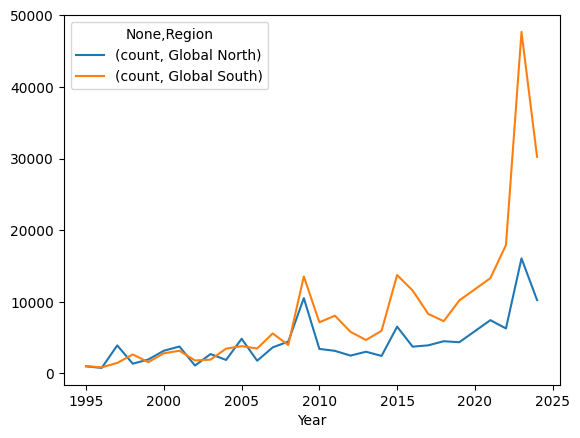

In [148]:
south_north_annual_pivot.plot()

In [172]:
df_countries[df_countries['Party'] == 1].groupby('Year')['Region'].value_counts()

Year  Region      
1995  Global North      445
      Global South      363
1996  Global South      521
      Global North      425
1997  Global North      834
      Global South      667
1998  Global South      741
      Global North      643
1999  Global North      797
      Global South      721
2000  Global North     1108
      Global South     1052
2001  Global North     1828
      Global South     1707
2002  Global South      740
      Global North      718
2003  Global North     1081
      Global South      849
2004  Global South     1180
      Global North     1023
2005  Global North     1401
      Global South     1401
2006  Global South     1410
      Global North      920
2007  Global South     1980
      Global North     1479
2008  Global North     2069
      Global South     1887
2009  Global South     6819
      Global North     3757
2010  Global South     3681
      Global North     1504
2011  Global South     4023
      Global North     1376
2012  Global South     3118
 

In [173]:
south_north_annual_party = df_countries[df_countries['Party'] == 1].groupby('Year')['Region'].value_counts().reset_index()
south_north_annual_party

,Year,Region,count
0,1995,Global North,445
1,1995,Global South,363
2,1996,Global South,521
3,1996,Global North,425
4,1997,Global North,834
5,1997,Global South,667
6,1998,Global South,741
7,1998,Global North,643
8,1999,Global North,797
9,1999,Global South,721


In [174]:
south_north_annual__party_pivot = south_north_annual_party.pivot_table(index=['Year'], columns=['Region'], values=['count'])
south_north_annual__party_pivot

count             
Region Global North Global South
Year                            
1995          445.0        363.0
1996          425.0        521.0
1997          834.0        667.0
1998          643.0        741.0
1999          797.0        721.0
2000         1108.0       1052.0
2001         1828.0       1707.0
2002          718.0        740.0
2003         1081.0        849.0
2004         1023.0       1180.0
2005         1401.0       1401.0
2006          920.0       1410.0
2007         1479.0       1980.0
2008         2069.0       1887.0
2009         3757.0       6819.0
2010         1504.0       3681.0
2011         1376.0       4023.0
2012         1215.0       3118.0
2013         1370.0       2641.0
2014         1217.0       3211.0
2015         2933.0       8971.0
2016         1803.0       8037.0
2017         1628.0       5071.0
2018         1744.0       3857.0
2019         1619.0       4880.0
2021         2666.0       7062.0
2022         2426.0       9544.0
2023        10149.0      34189.0
2024         6624.0      20467.0

In [175]:
south_north_annual__party_pivot.columns = south_north_annual__party_pivot.columns.droplevel()

In [176]:
south_north_annual__party_pivot['total'] = south_north_annual__party_pivot['Global North'] + south_north_annual__party_pivot['Global South']

In [177]:
south_north_annual__party_pivot['Global_South_pct'] = south_north_annual__party_pivot['Global South'] / south_north_annual__party_pivot['total']

In [178]:
south_north_annual__party_pivot.head(50)

Region,Global North,Global South,total,Global_South_pct
Year,,,,
1995,445.0,363.0,808.0,0.449257
1996,425.0,521.0,946.0,0.550740
1997,834.0,667.0,1501.0,0.444370
1998,643.0,741.0,1384.0,0.535405
1999,797.0,721.0,1518.0,0.474967
2000,1108.0,1052.0,2160.0,0.487037
2001,1828.0,1707.0,3535.0,0.482885
2002,718.0,740.0,1458.0,0.507545
2003,1081.0,849.0,1930.0,0.439896


In [189]:
df_countries['Country_combined'].value_counts()

Country_combined
Unable to determine                       48036
United States                             16469
Germany                                   12074
Japan                                     12067
Brazil                                    11221
China                                      8868
United Kingdom                             8187
India                                      8114
France                                     8040
Canada                                     7996
United Arab Emirates                       6556
South Korea                                5734
Italy                                      5618
Indonesia                                  5563
Nigeria                                    5368
Kenya                                      5337
Denmark                                    4753
Morocco                                    4621
Azerbaijan                                 4290
Turkey                                     4133
Sweden                 

In [215]:
countries_region_long = df_countries[['Year','Country_combined','Region']]
countries_region_long

,Year,Country_combined,Region
0,1995,Albania,Global South
1,1995,Albania,Global South
2,1995,Algeria,Global South
3,1995,Algeria,Global South
4,1995,Algeria,Global South
...,...,...,...
369155,2024,China,Global South
369156,2024,China,Global South
369157,2024,China,Global South
369158,2024,Canada,Global North


In [217]:
countries_region_long = countries_region_long.groupby(['Year','Country_combined','Region'])['Country_combined'].size()

In [218]:
countries_region_long

Year  Country_combined     Region      
1995  Albania              Global South      2
      Algeria              Global South      8
      Angola               Global South      4
      Antigua and Barbuda  Global South      3
      Argentina            Global South      8
                                          ... 
2024  Vietnam              Global South     76
      Western Sahara       Global South      2
      Yemen                Global South     89
      Zambia               Global South    168
      Zimbabwe             Global South    259
Name: Country_combined, Length: 5616, dtype: int64

In [219]:
countries_region_long = countries_region_long.reset_index(name='count')

In [220]:
countries_region_long

,Year,Country_combined,Region,count
0,1995,Albania,Global South,2
1,1995,Algeria,Global South,8
2,1995,Angola,Global South,4
3,1995,Antigua and Barbuda,Global South,3
4,1995,Argentina,Global South,8
...,...,...,...,...
5611,2024,Vietnam,Global South,76
5612,2024,Western Sahara,Global South,2
5613,2024,Yemen,Global South,89
5614,2024,Zambia,Global South,168


In [221]:
countries_region_long.to_csv('countries_region_long.csv')

In [191]:
countries_region = df_countries.pivot_table(index='Year', columns='Country_combined', values='Person_Name', aggfunc='count')
countries_region

Country_combined,,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,2.0,8.0,NaN,4.0,NaN,3.0,8.0,3.0,...,3.0,4.0,2.0,2.0,15.0,3.0,NaN,4.0,6.0,6.0
1996,5.0,NaN,2.0,7.0,NaN,NaN,NaN,1.0,8.0,1.0,...,5.0,1.0,2.0,3.0,17.0,4.0,NaN,5.0,5.0,18.0
1997,9.0,NaN,1.0,5.0,NaN,NaN,NaN,2.0,21.0,2.0,...,4.0,2.0,5.0,2.0,10.0,8.0,NaN,3.0,6.0,9.0
1998,5.0,NaN,1.0,3.0,NaN,NaN,NaN,2.0,797.0,3.0,...,7.0,2.0,NaN,4.0,16.0,5.0,NaN,NaN,4.0,8.0
1999,2.0,NaN,3.0,5.0,NaN,NaN,NaN,2.0,30.0,1.0,...,4.0,5.0,5.0,2.0,8.0,4.0,NaN,4.0,7.0,7.0
2000,11.0,NaN,2.0,12.0,NaN,5.0,NaN,3.0,27.0,5.0,...,12.0,3.0,7.0,2.0,12.0,6.0,NaN,4.0,7.0,8.0
2001,17.0,NaN,4.0,35.0,NaN,9.0,NaN,5.0,22.0,5.0,...,12.0,5.0,5.0,4.0,25.0,10.0,NaN,5.0,13.0,8.0
2002,4.0,NaN,1.0,8.0,NaN,4.0,NaN,NaN,7.0,1.0,...,6.0,1.0,2.0,2.0,8.0,5.0,NaN,4.0,2.0,6.0
2003,7.0,NaN,2.0,16.0,NaN,5.0,NaN,2.0,16.0,2.0,...,7.0,1.0,2.0,3.0,10.0,7.0,NaN,5.0,3.0,10.0


In [192]:
countries_region.to_csv('countries_by_year.csv')

In [228]:
countries_region_long.head()

,Year,Country_combined,Region,count
0,1995,Albania,Global South,2
1,1995,Algeria,Global South,8
2,1995,Angola,Global South,4
3,1995,Antigua and Barbuda,Global South,3
4,1995,Argentina,Global South,8


In [226]:
%%R

library(dplyr)

In [227]:
%%R
library(ggplot2)

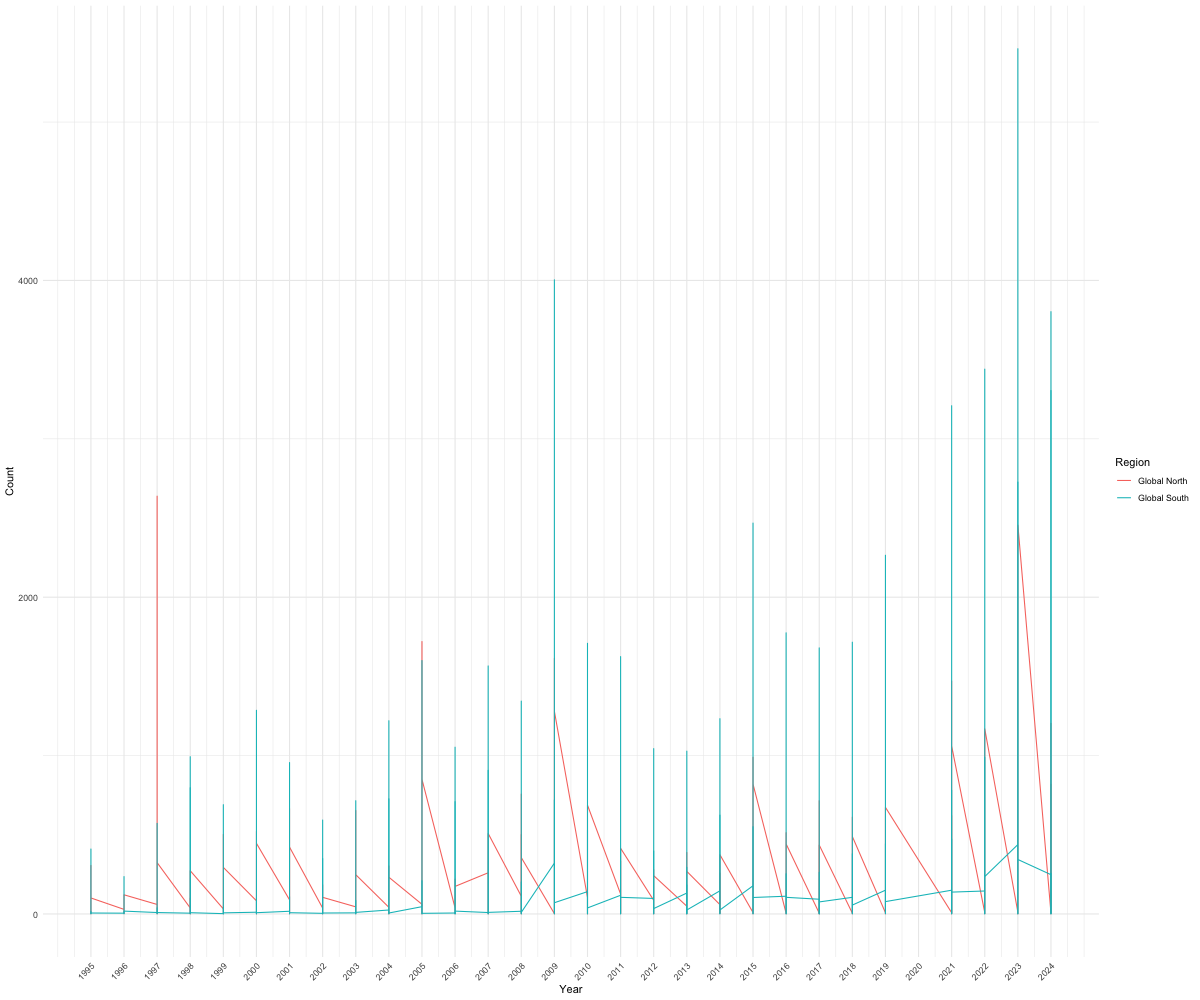

In [238]:
%%R -i countries_region_long -h 1000 -w 1200

ggplot(countries_region_long, aes(x = Year, y = count, color = Region)) + 
  geom_line() +  # Adds white borders around each country         # Optional: to separate by region if needed
  theme_minimal() +
  labs(x = "Year", y = "Count", fill = "Country") +
  scale_x_continuous(breaks = seq(min(countries_region_long$Year), max(countries_region_long$Year), by = 1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotates x-axis labels for readability


In [239]:
categories = pd.read_csv('categories_processed.csv')
categories.head()

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,Location,Female,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,Category
0,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Mr,Chen Wang,Events Director,The Climate Society,The Climate Society,1,0,2024,...,Baku,0.0,0,1,0,0,NaN,NaN,NaN,Students
1,Parties,Uzbekistan,Ms,Muattar Shakhabutdinova,Member of the audit committee,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,1.0,0,0,0,1,0.0,704.0,UZB,Members of youth-focused organizations
2,Parties,Uzbekistan,Mr,Rustam Kodirov,Coordinator,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,0.0,0,0,0,1,0.0,704.0,UZB,Members of youth-focused organizations
3,Parties,Uzbekistan,Mr,Jakhongir Talipov,Chief of International Cooperation Department,International Cooperation Department,"Ministry of Ecology, Environmental Protection ...",0,0,2024,...,Baku,0.0,0,0,0,1,0.0,704.0,UZB,Government representatives
4,Parties,Uzbekistan,Ms,Munisa Mullodzhanova,Project Manager,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,1.0,0,0,0,1,0.0,704.0,UZB,Other small and/or community-based NGOs


In [247]:
last_decade = categories[(categories['Year'] >= 2015)]
last_decade.head()

,Group_Type,Delegation,Honorific,Person_Name,Job_Title,Division,Affiliation,Virtual,Overflow,Year,...,Location,Female,IGO,NGO,Observer,Party,IO,Delegation_COW,Delegation_ISO,Category
0,Non-governmental organizations,Zhejiang Agriculture and Forestry University,Mr,Chen Wang,Events Director,The Climate Society,The Climate Society,1,0,2024,...,Baku,0.0,0,1,0,0,NaN,NaN,NaN,Students
1,Parties,Uzbekistan,Ms,Muattar Shakhabutdinova,Member of the audit committee,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,1.0,0,0,0,1,0.0,704.0,UZB,Members of youth-focused organizations
2,Parties,Uzbekistan,Mr,Rustam Kodirov,Coordinator,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,0.0,0,0,0,1,0.0,704.0,UZB,Members of youth-focused organizations
3,Parties,Uzbekistan,Mr,Jakhongir Talipov,Chief of International Cooperation Department,International Cooperation Department,"Ministry of Ecology, Environmental Protection ...",0,0,2024,...,Baku,0.0,0,0,0,1,0.0,704.0,UZB,Government representatives
4,Parties,Uzbekistan,Ms,Munisa Mullodzhanova,Project Manager,Uzbekistan Volunteers Association,Uzbekistan Volunteers Association,0,0,2024,...,Baku,1.0,0,0,0,1,0.0,704.0,UZB,Other small and/or community-based NGOs


In [244]:
last_decade.shape

(223385, 20)

In [248]:
last_decade['Category'].value_counts()

Category
Government representatives                              108121
Representatives of international NGOs                    28603
Other small and/or community-based NGOs                  21986
Representatives of intergovernmental organizations       20805
Researchers at universities or research institutes       13148
Members of other non-fossil fuel companies                7997
Members of youth-focused organizations                    5743
Representatives of large national NGOs                    4949
Students                                                  3766
Other non-fossil fuel companies                           2222
Fossil fuel representatives                               2030
Journalists/Media                                         1977
Other                                                      698
Representatives of other non-fossil fuel companies         620
Representatives of small and/or community-based NGOs       318
Scientists                                    

In [251]:
category_mapping = {
    'Other small and/or community-based NGOs': 'Representatives of small and/or community-based NGOs',
    'Representatives of small and/or community-based NGOs': 'Representatives of small and/or community-based NGOs',
    'Members of other non-fossil fuel companies': 'Other non-fossil fuel companies',
    'Representatives of other non-fossil fuel companies': 'Other non-fossil fuel companies',
    'Other non-fossil fuel companies': 'Other non-fossil fuel companies',
    'Representatives of other NGOs': 'Other NGOs'
}

last_decade['Category'] = last_decade['Category'].replace(category_mapping)

last_decade['Category'].value_counts()

Category
Government representatives                              108121
Representatives of international NGOs                    28603
Representatives of small and/or community-based NGOs     22304
Representatives of intergovernmental organizations       20805
Researchers at universities or research institutes       13148
Other non-fossil fuel companies                          10839
Members of youth-focused organizations                    5743
Representatives of large national NGOs                    4949
Students                                                  3766
Fossil fuel representatives                               2030
Journalists/Media                                         1977
Other                                                      698
Scientists                                                 280
Error                                                      121
Other NGOs                                                   1
Name: count, dtype: int64

In [252]:
last_decade[last_decade['Category'] == 'Members of youth-focused organizations'].groupby('Year').size()

Year
2015     326
2016     235
2017     195
2018     278
2019     354
2021     679
2022     674
2023    1714
2024    1288
dtype: int64

In [253]:
last_decade[last_decade['Category'] == 'Fossil fuel representatives'].groupby('Year').size()

Year
2015     84
2016     57
2017     63
2018     66
2019     92
2021    105
2022    105
2023    895
2024    563
dtype: int64

In [254]:
categories_pivot = last_decade.pivot_table(index='Year', columns='Category', aggfunc='size')
categories_pivot

Category,Error,Fossil fuel representatives,Government representatives,Journalists/Media,Members of youth-focused organizations,Other,Other NGOs,Other non-fossil fuel companies,Representatives of intergovernmental organizations,Representatives of international NGOs,Representatives of large national NGOs,Representatives of small and/or community-based NGOs,Researchers at universities or research institutes,Scientists,Students
Year,,,,,,,,,,,,,,,
2015,NaN,84.0,11040.0,215.0,326.0,5.0,NaN,342.0,2190.0,2797.0,459.0,1483.0,1042.0,47.0,240.0
2016,NaN,57.0,9027.0,68.0,235.0,12.0,NaN,228.0,1431.0,1825.0,300.0,1100.0,765.0,15.0,264.0
2017,NaN,63.0,6093.0,36.0,195.0,3.0,NaN,212.0,1528.0,1780.0,308.0,982.0,811.0,13.0,221.0
2018,NaN,66.0,5131.0,30.0,278.0,11.0,NaN,194.0,1218.0,2167.0,320.0,1244.0,825.0,20.0,300.0
2019,NaN,92.0,6009.0,50.0,354.0,10.0,NaN,257.0,1496.0,2823.0,358.0,1712.0,1023.0,22.0,351.0
2021,NaN,105.0,9023.0,128.0,679.0,15.0,NaN,460.0,1597.0,3652.0,591.0,2485.0,1557.0,28.0,417.0
2022,NaN,105.0,11048.0,103.0,674.0,10.0,NaN,445.0,2397.0,4180.0,578.0,2714.0,1434.0,16.0,517.0
2023,NaN,895.0,31499.0,830.0,1714.0,440.0,NaN,5817.0,5395.0,5702.0,1248.0,5955.0,3398.0,61.0,781.0
2024,121.0,563.0,19251.0,517.0,1288.0,192.0,1.0,2884.0,3553.0,3677.0,787.0,4629.0,2293.0,58.0,675.0


In [255]:
categories_pivot['Total Attendees'] = categories_pivot.sum(axis=1)
categories_pivot

Category,Error,Fossil fuel representatives,Government representatives,Journalists/Media,Members of youth-focused organizations,Other,Other NGOs,Other non-fossil fuel companies,Representatives of intergovernmental organizations,Representatives of international NGOs,Representatives of large national NGOs,Representatives of small and/or community-based NGOs,Researchers at universities or research institutes,Scientists,Students,Total Attendees
Year,,,,,,,,,,,,,,,,
2015,NaN,84.0,11040.0,215.0,326.0,5.0,NaN,342.0,2190.0,2797.0,459.0,1483.0,1042.0,47.0,240.0,20270.0
2016,NaN,57.0,9027.0,68.0,235.0,12.0,NaN,228.0,1431.0,1825.0,300.0,1100.0,765.0,15.0,264.0,15327.0
2017,NaN,63.0,6093.0,36.0,195.0,3.0,NaN,212.0,1528.0,1780.0,308.0,982.0,811.0,13.0,221.0,12245.0
2018,NaN,66.0,5131.0,30.0,278.0,11.0,NaN,194.0,1218.0,2167.0,320.0,1244.0,825.0,20.0,300.0,11804.0
2019,NaN,92.0,6009.0,50.0,354.0,10.0,NaN,257.0,1496.0,2823.0,358.0,1712.0,1023.0,22.0,351.0,14557.0
2021,NaN,105.0,9023.0,128.0,679.0,15.0,NaN,460.0,1597.0,3652.0,591.0,2485.0,1557.0,28.0,417.0,20737.0
2022,NaN,105.0,11048.0,103.0,674.0,10.0,NaN,445.0,2397.0,4180.0,578.0,2714.0,1434.0,16.0,517.0,24221.0
2023,NaN,895.0,31499.0,830.0,1714.0,440.0,NaN,5817.0,5395.0,5702.0,1248.0,5955.0,3398.0,61.0,781.0,63735.0
2024,121.0,563.0,19251.0,517.0,1288.0,192.0,1.0,2884.0,3553.0,3677.0,787.0,4629.0,2293.0,58.0,675.0,40489.0


In [257]:
categories_pivot['Fossil fuel representatives_pct'] = categories_pivot['Fossil fuel representatives'] / categories_pivot['Total Attendees']

In [259]:
categories_pivot['Government representatives_pct'] = categories_pivot['Government representatives'] / categories_pivot['Total Attendees']
categories_pivot['Representatives of international NGOs_pct'] = categories_pivot['Representatives of international NGOs'] / categories_pivot['Total Attendees']
categories_pivot['Representatives of small and/or community-based NGOs_pct'] = categories_pivot['Representatives of small and/or community-based NGOs'] / categories_pivot['Total Attendees']
categories_pivot['Representatives of intergovernmental organizations_pct'] = categories_pivot['Representatives of intergovernmental organizations'] / categories_pivot['Total Attendees']
categories_pivot['Researchers at universities or research institutes_pct'] = categories_pivot['Researchers at universities or research institutes'] / categories_pivot['Total Attendees']
categories_pivot['Other non-fossil fuel companies_pct'] = categories_pivot['Other non-fossil fuel companies'] / categories_pivot['Total Attendees']
categories_pivot['Members of youth-focused organizations_pct'] = categories_pivot['Members of youth-focused organizations'] / categories_pivot['Total Attendees']
categories_pivot['Representatives of large national NGOs_pct'] = categories_pivot['Representatives of large national NGOs'] / categories_pivot['Total Attendees']
categories_pivot['Students_pct'] = categories_pivot['Students'] / categories_pivot['Total Attendees']
categories_pivot['Journalists/Media_pct'] = categories_pivot['Journalists/Media'] / categories_pivot['Total Attendees']
categories_pivot['Other_pct'] = categories_pivot['Other'] / categories_pivot['Total Attendees']
categories_pivot['Scientists_pct'] = categories_pivot['Scientists'] / categories_pivot['Total Attendees']
categories_pivot['Error_pct'] = categories_pivot['Error'] / categories_pivot['Total Attendees']
categories_pivot['Other NGOs_pct'] = categories_pivot['Other NGOs'] / categories_pivot['Total Attendees']

In [262]:
pd.set_option('display.max_columns', None)

In [263]:
categories_pivot

Category,Error,Fossil fuel representatives,Government representatives,Journalists/Media,Members of youth-focused organizations,Other,Other NGOs,Other non-fossil fuel companies,Representatives of intergovernmental organizations,Representatives of international NGOs,Representatives of large national NGOs,Representatives of small and/or community-based NGOs,Researchers at universities or research institutes,Scientists,Students,Total Attendees,Fossil fuel representatives_pct,Government representatives_pct,Representatives of international NGOs_pct,Representatives of small and/or community-based NGOs_pct,Representatives of intergovernmental organizations_pct,Researchers at universities or research institutes_pct,Other non-fossil fuel companies_pct,Members of youth-focused organizations_pct,Representatives of large national NGOs_pct,Students_pct,Journalists/Media_pct,Other_pct,Scientists_pct,Error_pct,Other NGOs_pct
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,NaN,84.0,11040.0,215.0,326.0,5.0,NaN,342.0,2190.0,2797.0,459.0,1483.0,1042.0,47.0,240.0,20270.0,0.004144,0.544647,0.137987,0.073162,0.108041,0.051406,0.016872,0.016083,0.022644,0.011840,0.010607,0.000247,0.002319,NaN,NaN
2016,NaN,57.0,9027.0,68.0,235.0,12.0,NaN,228.0,1431.0,1825.0,300.0,1100.0,765.0,15.0,264.0,15327.0,0.003719,0.588961,0.119071,0.071769,0.093365,0.049912,0.014876,0.015332,0.019573,0.017225,0.004437,0.000783,0.000979,NaN,NaN
2017,NaN,63.0,6093.0,36.0,195.0,3.0,NaN,212.0,1528.0,1780.0,308.0,982.0,811.0,13.0,221.0,12245.0,0.005145,0.497591,0.145365,0.080196,0.124786,0.066231,0.017313,0.015925,0.025153,0.018048,0.002940,0.000245,0.001062,NaN,NaN
2018,NaN,66.0,5131.0,30.0,278.0,11.0,NaN,194.0,1218.0,2167.0,320.0,1244.0,825.0,20.0,300.0,11804.0,0.005591,0.434683,0.183582,0.105388,0.103185,0.069892,0.016435,0.023551,0.027109,0.025415,0.002542,0.000932,0.001694,NaN,NaN
2019,NaN,92.0,6009.0,50.0,354.0,10.0,NaN,257.0,1496.0,2823.0,358.0,1712.0,1023.0,22.0,351.0,14557.0,0.006320,0.412791,0.193927,0.117607,0.102768,0.070275,0.017655,0.024318,0.024593,0.024112,0.003435,0.000687,0.001511,NaN,NaN
2021,NaN,105.0,9023.0,128.0,679.0,15.0,NaN,460.0,1597.0,3652.0,591.0,2485.0,1557.0,28.0,417.0,20737.0,0.005063,0.435116,0.176110,0.119834,0.077012,0.075083,0.022183,0.032743,0.028500,0.020109,0.006173,0.000723,0.001350,NaN,NaN
2022,NaN,105.0,11048.0,103.0,674.0,10.0,NaN,445.0,2397.0,4180.0,578.0,2714.0,1434.0,16.0,517.0,24221.0,0.004335,0.456133,0.172578,0.112052,0.098964,0.059205,0.018372,0.027827,0.023864,0.021345,0.004253,0.000413,0.000661,NaN,NaN
2023,NaN,895.0,31499.0,830.0,1714.0,440.0,NaN,5817.0,5395.0,5702.0,1248.0,5955.0,3398.0,61.0,781.0,63735.0,0.014043,0.494218,0.089464,0.093434,0.084647,0.053315,0.091269,0.026893,0.019581,0.012254,0.013023,0.006904,0.000957,NaN,NaN
2024,121.0,563.0,19251.0,517.0,1288.0,192.0,1.0,2884.0,3553.0,3677.0,787.0,4629.0,2293.0,58.0,675.0,40489.0,0.013905,0.475462,0.090815,0.114327,0.087752,0.056633,0.071229,0.031811,0.019437,0.016671,0.012769,0.004742,0.001432,0.002988,0.000025


In [264]:
value_2015 = categories_pivot.loc[2015]
value_2024 = categories_pivot.loc[2024]

percentage_change_2015_2024 = ((value_2024 - value_2015) / value_2015) * 100

percentage_change_2015_2024

Category
Error                                                               NaN
Fossil fuel representatives                                  570.238095
Government representatives                                    74.375000
Journalists/Media                                            140.465116
Members of youth-focused organizations                       295.092025
Other                                                       3740.000000
Other NGOs                                                          NaN
Other non-fossil fuel companies                              743.274854
Representatives of intergovernmental organizations            62.237443
Representatives of international NGOs                         31.462281
Representatives of large national NGOs                        71.459695
Representatives of small and/or community-based NGOs         212.137559
Researchers at universities or research institutes           120.057582
Scientists                                             

In [265]:
percentage_change_2015_2024 = percentage_change_2015_2024.reset_index()

In [266]:
percentage_change_2015_2024

,Category,0
0,Error,NaN
1,Fossil fuel representatives,570.238095
2,Government representatives,74.375000
3,Journalists/Media,140.465116
4,Members of youth-focused organizations,295.092025
5,Other,3740.000000
6,Other NGOs,NaN
7,Other non-fossil fuel companies,743.274854
8,Representatives of intergovernmental organizat...,62.237443
9,Representatives of international NGOs,31.462281


In [267]:
percentage_change_2015_2024.to_csv('percentage_change_2015_2024.csv')

In [261]:
categories_pivot.to_csv('categories.pivot.csv')

In [245]:
categories.groupby('Year')['Category'].value_counts()

Year  Category                                            
2013  Government representatives                               1112
      Researchers at universities or research institutes         21
      Students                                                   12
      Representatives of international NGOs                      10
      Members of other non-fossil fuel companies                  9
      Other small and/or community-based NGOs                     9
      Representatives of large national NGOs                      8
      Fossil fuel representatives                                 7
      Journalists/Media                                           4
      Members of youth-focused organizations                      2
      Other non-fossil fuel companies                             2
      Scientists                                                  2
      Representatives of intergovernmental organizations          1
      Representatives of other non-fossil fuel companies 